# Topic Modeling with C-TFIDF and LDA (Latent Dirichlet Allocation (LDA))




This notebook is organized as follows:

- Extract Technology and Health Sample Data.
- Document Article text embedding using all-mpnet-base-v2 transformer model.
- Dimensionality reduction using PCA, KPCA, TSNE and UMDP.
- Visualize the reduced features data in 2 dimensions using first two principal components generated through PCA, KPCA, TSNE and UMDP.
- Cluster Documents through K-Means and DBSCAN using the reduced features obtained by PCA and UMDP.
- Cluster Document through K-Means using the reduced features obtained by KPCA.
- Cluster document using HDBSCAN clustering algorithm.
- Cluster Documents through BDSCAN and HDBSCAN using the reduced features obtained by UMDP.
- Apply C-TF-IDF on each cluster obtained by DBSCAN and extract topics.
- Apply C-TF-IDF on each cluster obtained by HDBSCAN and extract topics.
- Apply Latent Dirichlet Allocation (LDA) on each cluster obtained by HDBSCAN and extract topics.

# Install required Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install joblib==1.1.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# SentenceTransformers is a Python framework for state-of-the-art sentence, text and image embeddings.

!pip install -U sentence-transformers
!pip install umap-learn
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Imports and Setup

In [ ]:
import pandas as pd
pd.set_option('max_colwidth',150)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
import numpy as np
import os
import re
from string import punctuation
from datetime import datetime as dt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # allow multiple outputs in a cell
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import tensorflow as tf
import torch
import sklearn
import pickle

#Scaling
from sklearn.preprocessing import StandardScaler

#importing sentence transformer
from sentence_transformers import SentenceTransformer


#Importing PCA and TSNE
from sklearn.decomposition import PCA,  KernelPCA
from sklearn.manifold import TSNE
from matplotlib import style

import numpy as np
import pandas as pd
import scipy.sparse as sp

from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [ ]:
# Loading NLTK Modules
import nltk
nltk.download('all')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Loading Gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

# Download the Datasets

In [ ]:
# pathdir = "/content/data"

In [ ]:
# def download_dataset():
  
#   if not os.path.isfile('all-the-news-2-1.zip?dl=0'):

#     # Downloading Annotated Corpus for Named Entity Recognition dataset
#     !wget https://www.dropbox.com/s/cn2utnr5ipathhh/all-the-news-2-1.zip?dl=0

#   if not os.path.exists(pathdir):
#     # Make a data folder to store the data
#     !mkdir data

#     !unzip /content/all-the-news-2-1.zip?dl=0 
#     !mv /content/all-the-news-2-1.csv ./data

#     !rm /content/all-the-news-2-1.zip?dl=0


In [ ]:
# download_dataset()

# Load Data

In [ ]:
# #specify the path to data location

# filepath = '/content/data/all-the-news-2-1.csv'
# data = pd.read_csv(filepath, encoding = "utf-8") 


In [ ]:
# #Verify that the data is loaded correctly
# data.head(3)

In [ ]:
# #totally we have 2,688,878 rows and 10 columns
# data.shape

In [ ]:
# data.info()

In [ ]:
# data.isnull().sum()

In [ ]:
# def filter_section(section):

#   if str(section).lower().startswith('tech') :
#     return 'technology'
#   elif str(section).lower().startswith('health'):
#     return 'health'

#   return 'other'

In [ ]:
# data['tech_health_tag'] = data['section'].apply(filter_section)

In [ ]:
# data['tech_health_tag'].value_counts()

# Load Technology and Health Section Data

In [ ]:
# data_tech_health = data[(data['tech_health_tag']=='technology') |  (data['tech_health_tag']=='health')]

In [ ]:
# data_tech_health.head(3)

In [ ]:
# data_tech_health.isnull().sum()

# Data Cleansing

In [ ]:
# def remove_special_char(df):
#     special_char = list(punctuation)
#     for e in ['.','?']:
#         special_char.remove(e)
#     special_char.append("\n+")
#     # special_char.append("\s+")
#     special_char.append("\xa0")

#     def deep_clean(text_str):
#       text_str = str(text_str)
#       text_str =text_str.strip()
#       text_str = text_str.lower()
#       text_str = re.sub('<[^>]*>', '', text_str)
#       for char in special_char:
#           text_str = text_str.replace(char, '')
#       return text_str

#     df['article'] = df['article'].apply(deep_clean)
#     df['title'] = df['title'].apply(deep_clean)
#     return df

# def clean_dataFrame(df):
#   missing_cols = df.isnull().sum()
#   drop_missing_cols = missing_cols[(missing_cols > len(df)/20)].sort_values()
#   df = df.drop(drop_missing_cols.index, axis=1)
#   df['date'] = pd.to_datetime(df['date'])
#   df = df.dropna()
#   #reset index
#   df = df.reset_index(drop=True)
#   # make all columns lower_case 
#   df.columns = df.columns.str.lower()
#   df = remove_special_char(df)
#   return df

In [ ]:
# data_tech_health = clean_dataFrame(data_tech_health)

In [ ]:
# data_tech_health.info()

# Drop document less than 10 words

In [ ]:
# data_tech_health['word_count'] = data_tech_health['article'].apply(lambda x: len(x.split()))

In [ ]:
# data_tech_health[data_tech_health['word_count']<10]['article'].count()

In [ ]:
# data_tech_health[data_tech_health['word_count']<10]['article']

In [ ]:
# data_tech_health = data_tech_health[data_tech_health['word_count']>=10]

In [ ]:
# data_tech_health.shape

In [ ]:
# data_article_filter = data_tech_health[['article','section','tech_health_tag']]

In [ ]:
# data_tech = data_article_filter.sample(5000, random_state=1)

In [ ]:
# from IPython.lib.security import random
# data_health = data_article_filter.sample(5000, random_state=1)

In [ ]:
# data_tech_health_sample = pd.concat([data_health,data_tech],ignore_index=True)
# # shuffle the DataFrame rows
# data_tech_health_sample = data_tech_health_sample.sample(frac = 1)
# # drop index
# data_tech_health_sample = data_tech_health_sample.reset_index(drop=True)

In [ ]:
# data_tech_health_sample.info()

In [ ]:
# data_tech_health_sample.head()

In [ ]:
# # specify path file to save data_tech_health_sample
# path_file = '/content/drive/MyDrive/GLG_vec_embd'
# data_tech_health_sample.to_csv('/content/drive/MyDrive/GLG_Data/data_tech_health_sample', sep=',', index=False)

In [ ]:
# Download data_tech_sample csv into the current directory
!gdown https://drive.google.com/uc?id=1-72kMKpRLUofdKQ_J8TySMEDuubqcg00

Downloading...
From: https://drive.google.com/uc?id=1-72kMKpRLUofdKQ_J8TySMEDuubqcg00
To: /content/data_tech_health_sample
100% 29.3M/29.3M [00:00<00:00, 113MB/s] 


In [ ]:
data_tech_health_sample = pd.read_csv('/content/data_tech_health_sample', sep=',')

In [ ]:
data_tech_health_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article          10000 non-null  object
 1   section          10000 non-null  object
 2   tech_health_tag  10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [ ]:
# Downloading article  embedding
# !gdown https://drive.google.com/uc?id=14zNVPi9fnGlpx50PLwTjrRv5JM9f74kS
# !gdown https://drive.google.com/uc?id=1Mgbi-TAIddiYeTSx72MtpNNd-z84OXur
# https://drive.google.com/file/d/1Mgbi-TAIddiYeTSx72MtpNNd-z84OXur/view?usp=sharing

# Document Embedding

In [ ]:

#By default, input text longer than 128 word pieces is truncated.
sentence_model = SentenceTransformer("all-mpnet-base-v2")

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
# def doc_to_vectors(doc):
#     paragraphs  = doc.split('  ')

#     # def valid_sent(sent):
#     #     return True if len(sent.split(" ")) > 1 else False
#     # Paragraph to vector representation
#     vector = np.array([paragraph_to_vector(p) for p in paragraphs]).mean(axis=0)

#     return vector

# def paragraph_to_vector(sent):
#     # Encode the paragraph


#     #Compute the embeddings using the multi-process pool
#     embeddings = sentence_model.encode(sent, show_progress_bar=False, device='cuda')

#     return embeddings

In [ ]:
# vec_data = [doc_to_vectors(i) for i in data_tech_health_sample['article']]
# vec_df = pd.DataFrame(vec_data)
# vec_df.to_csv('/content/drive/MyDrive/GLG_vec_embd/article_embedding.csv', sep=',', index=False)

In [ ]:
article_embed = pd.read_csv('/content/drive/MyDrive/GLG_vec_embd/article_embedding.csv', sep=',')

In [ ]:
article_embed.shape

(10000, 768)

In [ ]:
# scaling the data
#to scale the data using z-score 
scaler=StandardScaler()
article_embed=pd.DataFrame(scaler.fit_transform(article_embed), columns=article_embed.columns)

In [ ]:
article_embed.shape

(10000, 768)

# Feature dimension reduction using PCA, TSNE and UMDP

- Reduce the number of article embedding by using dimensionality reduction techniques like PCA and TSNE and generate meaningful insights. 

# 1. Principal Component Analysis(PCA)

In [ ]:
#Defining the number of principal components to generate 
n=article_embed.shape[1]

#Finding principal components for the data
pca = PCA(n_components=n,random_state = 1) #Applying the PCA algorithm with random state = 1
article_embed_pca = pd.DataFrame(pca.fit_transform(article_embed)) #Fitting and transforming the pca function on article data

#The percentage of variance explained by each principal component
exp_var = pca.explained_variance_ratio_

In [ ]:
article_embed_pca.shape

(10000, 768)

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'number of components')

Text(0, 0.5, 'cumulative explained variance')

Text(0.5, 1.0, 'Cumulative variance plot')

([<matplotlib.axis.YTick at 0x7fa6139b73d0>,
 <a list of 11 Text major ticklabel objects>)

([<matplotlib.axis.XTick at 0x7fa6125c3e10>,
 <a list of 16 Text major ticklabel objects>)

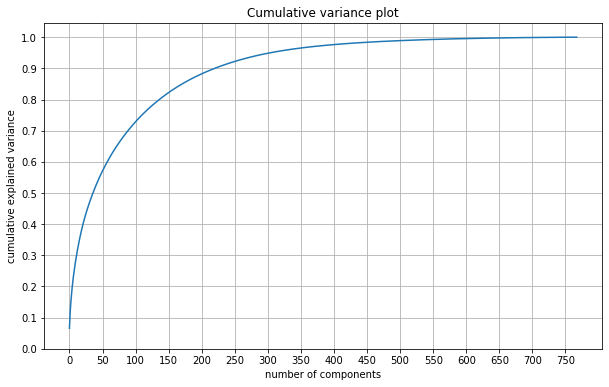

In [ ]:
# visualizing the explained variance by individual components
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(exp_var))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative variance plot')
plt.yticks(np.arange(0,1.1, 0.1))
plt.xticks(np.arange(0,800, 50))
plt.grid()
plt.show()

# Observation
From the plot above we see thath the explained variance is increasing very quickly in between 0-250 components then it smooths out reaching 95% explainability between 250-300 principal component. 

In [ ]:
threshold_var = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99] 

for var in threshold_var:
  c = 0
  i = -1
  while c <= var:
    i += 1
    c = c + exp_var[i]
  print('Number of components to explain', '{:.0f}%'.format(var*100), 'of variance is', '{}'.format(i+1))

Number of components to explain 50% of variance is 37
Number of components to explain 60% of variance is 59
Number of components to explain 70% of variance is 90
Number of components to explain 80% of variance is 137
Number of components to explain 90% of variance is 221
Number of components to explain 95% of variance is 305
Number of components to explain 99% of variance is 513


In [ ]:
# YOUR CODE HERE (imports!)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    scaler = StandardScaler().fit(x_train)
    x_train = scaler.transform(x_train) 
    x_test = scaler.transform(x_test) 
    lr_model = LogisticRegression(random_state=0, class_weight='balanced').fit(x_train, y_train) 
    lr_pred = lr_model.predict(x_test) 
    print(classification_report(y_test, lr_pred, labels=[0,1]))

In [ ]:
X = article_embed_pca.loc[:,0:305]
y = data_tech_health_sample['tech_health_tag']
y.shape

(10000,)

In [ ]:
y = y.replace(to_replace = 'health', value = 0)
y = y.replace(to_replace = 'technology', value = 1)
y

0       0
1       1
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: tech_health_tag, Length: 10000, dtype: int64

In [ ]:
train(X, y)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1004
           1       0.97      0.97      0.97       996

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [ ]:
pca.components_.shape

(768, 768)

# Visualize the data in 2 dimensions using first two principal components

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

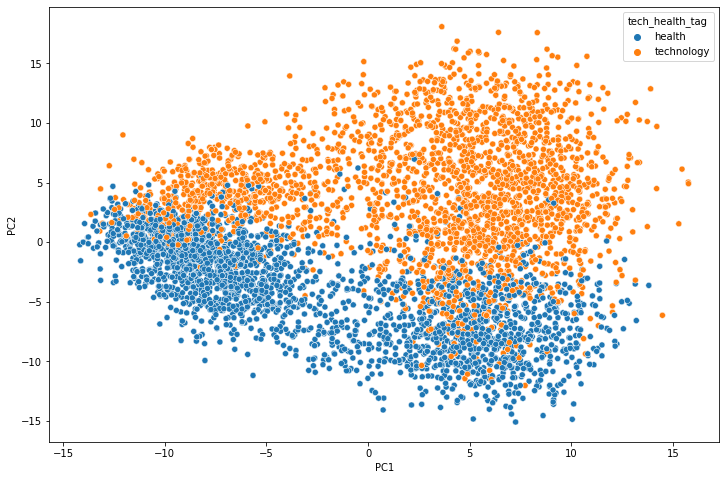

In [ ]:
plt.figure(figsize = (12,8))
sns.scatterplot(x=article_embed_pca[0],y=article_embed_pca[1], hue=data_tech_health_sample['tech_health_tag'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# 2. Apply the TSNE embedding with 2 components

In [ ]:
tsne = TSNE(n_components = 2, random_state = 1)  #Applying the TSNE algorithm with random state = 1
article_embed_tsne = tsne.fit_transform(article_embed) #Fitting and transforming tsne function on the article embedding data

In [ ]:
article_embed_tsne.shape


(10000, 2)

In [ ]:
data_tsne = pd.DataFrame(data = article_embed_tsne, columns = ['Component 1', 'Component 2'])

In [ ]:
data_tsne['label'] = data_tech_health_sample['tech_health_tag']

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Component 1')

Text(0, 0.5, 'Component 2')

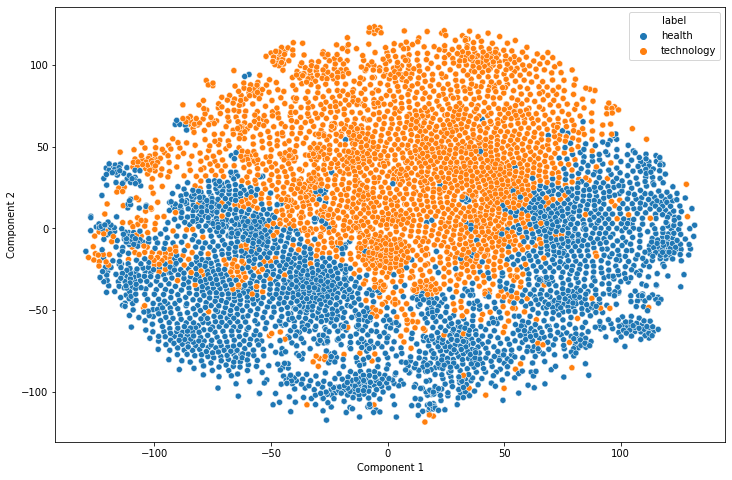

In [ ]:
plt.figure(figsize = (12,8))
#Create a scatter plot with x=0 and y=1 
sns.scatterplot(x = 'Component 1', y = 'Component 2', data=data_tsne, hue = 'label')

plt.xlabel('Component 1')
plt.ylabel('Component 2')

#3. Apply Kernel PCA

In [ ]:
kernel_pca = KernelPCA(
    n_components=2, kernel="rbf", gamma=0.002, alpha=1.0
)

article_embed_kpca = kernel_pca.fit_transform(article_embed)

In [ ]:
explained_variance = np.var(article_embed_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
explained_variance_ratio

array([0.76861572, 0.23138428])

In [ ]:
np.cumsum(explained_variance_ratio)

array([0.76861572, 1.        ])

In [ ]:
data_kpca = pd.DataFrame(data = article_embed_kpca, columns = ['Component_1', 'Component_2'])

In [ ]:
data_kpca['label'] = data_tech_health_sample['tech_health_tag']

<Figure size 864x576 with 0 Axes>

Text(0.5, 0, 'Component_1')

Text(0, 0.5, 'Component_2')

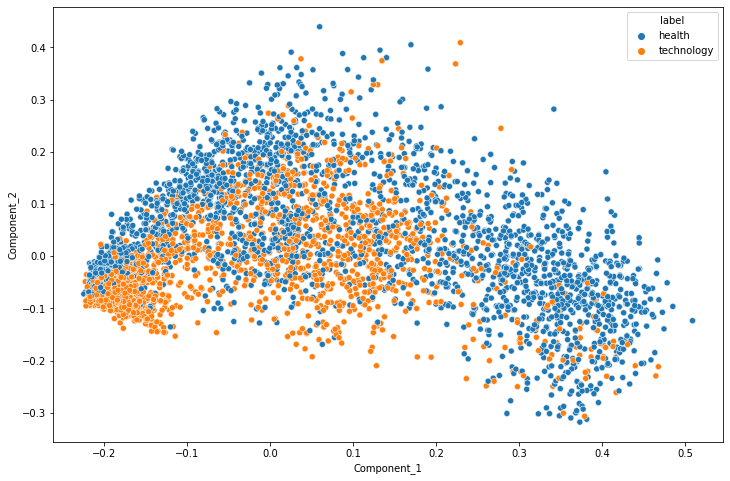

In [ ]:
plt.figure(figsize = (12,8))
#Create a scatter plot with x=0 and y=1 
sns.scatterplot(x = 'Component_1', y = 'Component_2', data=data_kpca, hue = 'label')

plt.xlabel('Component_1')
plt.ylabel('Component_2')

In [ ]:
X = data_kpca


In [ ]:
X.shape

(10000, 2)

In [ ]:
y = y.replace(to_replace = 'health', value = 0)
y = y.replace(to_replace = 'technology', value = 1)
y

0       0
1       1
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    1
9998    0
9999    1
Name: tech_health_tag, Length: 10000, dtype: int64

In [ ]:
train(X,y)

              precision    recall  f1-score   support

           0       0.72      0.75      0.73      1004
           1       0.74      0.70      0.72       996

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000



#4. Apply UMAP

In [ ]:
#import UMAP
from umap import UMAP

# umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')


In [ ]:
%%time


# umap_results =  UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine', random_state=42).fit_transform(article_embed)

reducer =  UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

reducer.fit(article_embed)
data_umap = reducer.transform(article_embed)

# embedding = reducer.transform(digits.data)

CPU times: user 22.9 s, sys: 901 ms, total: 23.8 s
Wall time: 20.6 s


In [ ]:
explained_variance = np.var(data_umap, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
explained_variance_ratio

array([0.58708185, 0.06157956, 0.1812106 , 0.13386719, 0.03626078],
      dtype=float32)

In [ ]:
np.cumsum(explained_variance_ratio)

array([0.58708185, 0.6486614 , 0.829872  , 0.9637392 , 1.        ],
      dtype=float32)

In [ ]:
data_umap = pd.DataFrame(data = data_umap, columns = ['Component_1', 'Component_2','Component_3', 'Component_4','Component_5'])

In [ ]:
data_umap['label'] = data_tech_health_sample['tech_health_tag']

<Figure size 1080x576 with 0 Axes>

Text(0.5, 0, 'Component_1')

Text(0, 0.5, 'Component_2')

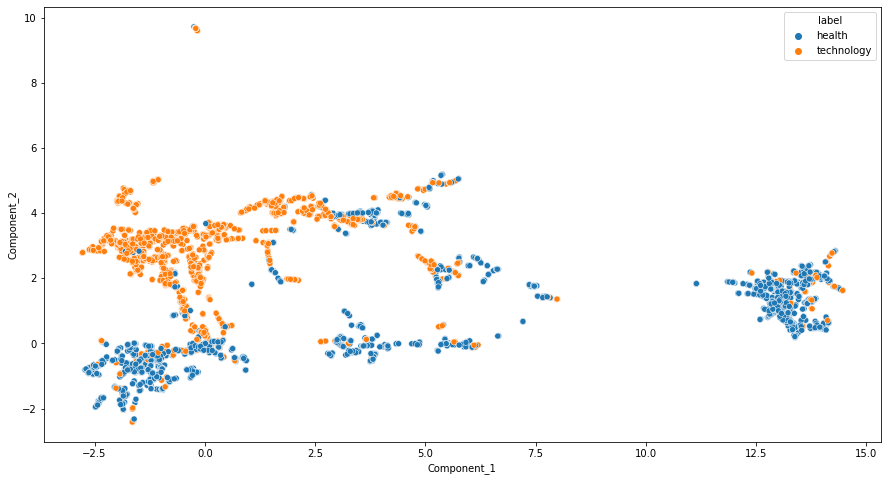

In [ ]:
plt.figure(figsize = (15,8))
#Create a scatter plot with x=0 and y=1 
sns.scatterplot(x = 'Component_1', y = 'Component_2', data=data_umap, hue = 'label')

plt.xlabel('Component_1')
plt.ylabel('Component_2')

In [ ]:
data_umap.shape

(10000, 5)

In [ ]:
train(data_umap, y)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1004
           1       0.92      0.89      0.91       996

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



# Cluster Document using K-Means on PCA reduced data

In [ ]:
#select number of components from PCA result which explain 95% of variance is 305
X_kmeans = article_embed_pca

In [ ]:
X_kmeans = X_kmeans.loc[:,0:305]

In [ ]:
X_kmeans.shape

(10000, 306)

In [ ]:
y = data_tech_health_sample['tech_health_tag']

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_kmeans, y, test_size=0.05, random_state=42)

In [ ]:
X_kmeans.shape

(10000, 306)

In [ ]:
y.shape

(10000,)

In [ ]:
from sklearn.cluster import KMeans

def kmeans_cluster(cluster_size, data):
  clusters = []

  for i in range(1, cluster_size+1):
      # km = KMeans(n_clusters=i).fit(data)
      km =KMeans(n_clusters=i,init='k-means++',max_iter=800,n_init=10,random_state=0).fit(data)
      clusters.append(km.inertia_)
      
  fig, ax = plt.subplots(figsize=(12, 8))
  sns.lineplot(x=list(range(1, cluster_size+1)), y=clusters, ax=ax)
  ax.set_title('Searching for Elbow when cluster size is ' + str(cluster_size))
  ax.set_xlabel('Clusters')
  ax.set_ylabel('Inertia')

  plt.show()

  return km, clusters


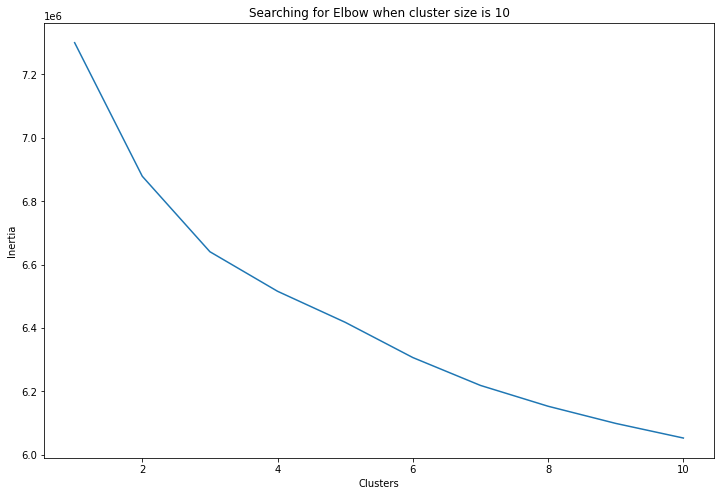

In [ ]:
km_pca, clusters = kmeans_cluster(10, X_kmeans)

In [ ]:
clusters

[7300332.922616691,
 6878820.750589656,
 6640585.114053558,
 6515790.16422887,
 6417906.375419932,
 6306616.437554248,
 6218658.985791425,
 6152951.780224442,
 6098788.419635861,
 6052624.132808011]

In [ ]:
km_pca.labels_.shape

(10000,)

In [ ]:
# combine two series and create and return a dataframe
def create_df(cluster_labels, y_train):
  data = {"label": pd.Series(cluster_labels),
        "doc_catagory": pd.Series(y_train.values)}

  df = pd.concat(data, axis = 1)

  return df


In [ ]:
df_pca = create_df(km_pca.labels_, y)

In [ ]:
def plot_figure(df, column_name1,column_name2):

  plt.figure(figsize=(18,8))
  publication_plot = sns.countplot(
      data=df,
      x=column_name1,
      hue = column_name2,
      palette='Set1',
      order = df[column_name1].value_counts().index
  )

  plt.xticks(
      rotation=45, 
      horizontalalignment='right',
      fontweight='light',
      fontsize='x-large'  
  )
  plt.show()

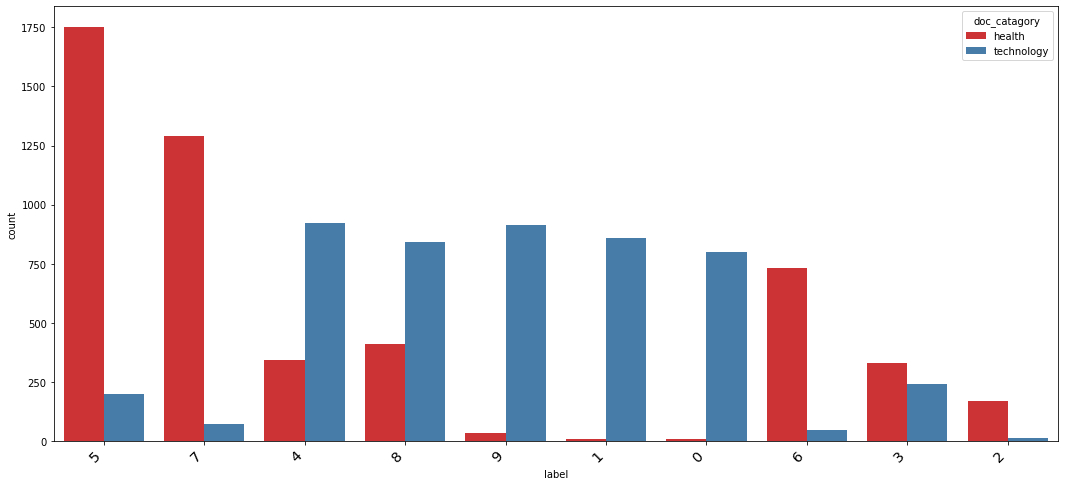

In [ ]:
plot_figure(df_pca, 'label','doc_catagory')

In [ ]:
def plot_all_cluster(df, col1_data,col2_data,cluster_size):
  plt.figure(figsize=(12, 8))
  sns.scatterplot(col1_data, col2_data, hue=df['label'], 
                  palette=sns.color_palette('hls', cluster_size))
  plt.title('KMeans with 10 Clusters')
  plt.show()


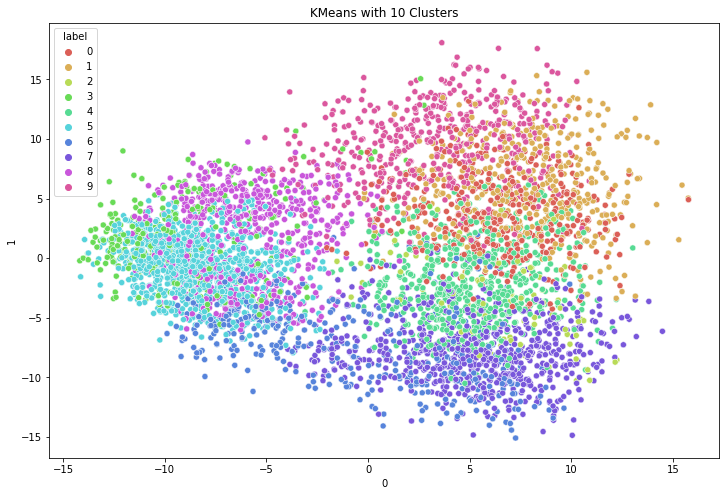

In [ ]:
plot_all_cluster(df_pca, X_kmeans[0],X_kmeans[1],10)

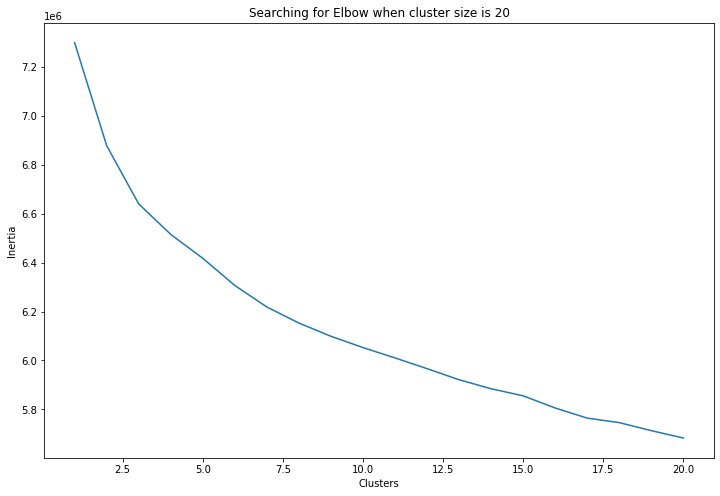

In [ ]:
km_pca, clusters = kmeans_cluster(20, X_kmeans)

In [ ]:
df_pca = create_df(km_pca.labels_, y)

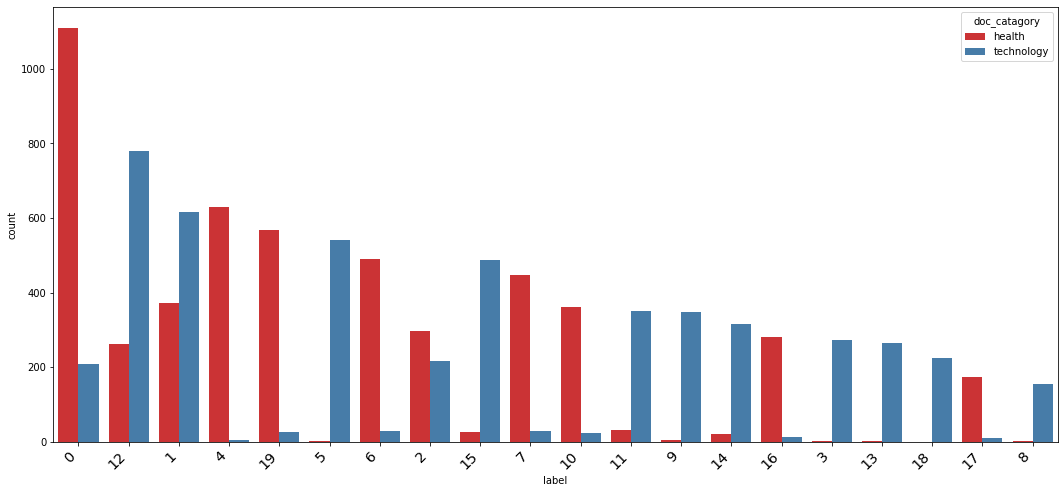

In [ ]:
plot_figure(df_pca, 'label','doc_catagory')

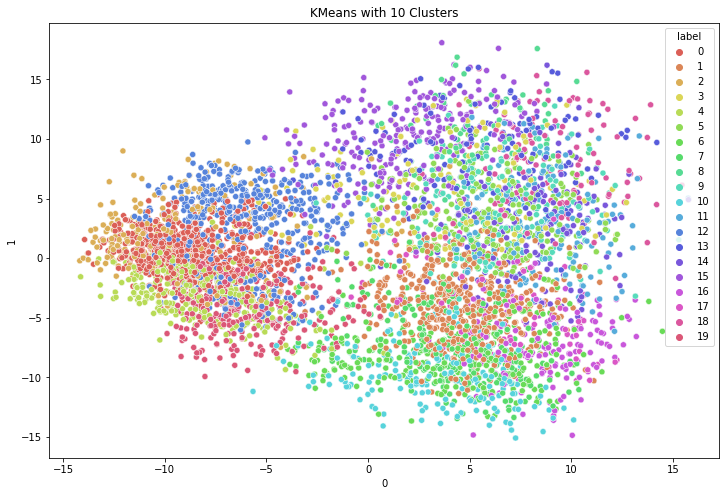

In [ ]:
plot_all_cluster(df_pca, X_kmeans[0],X_kmeans[1],20)

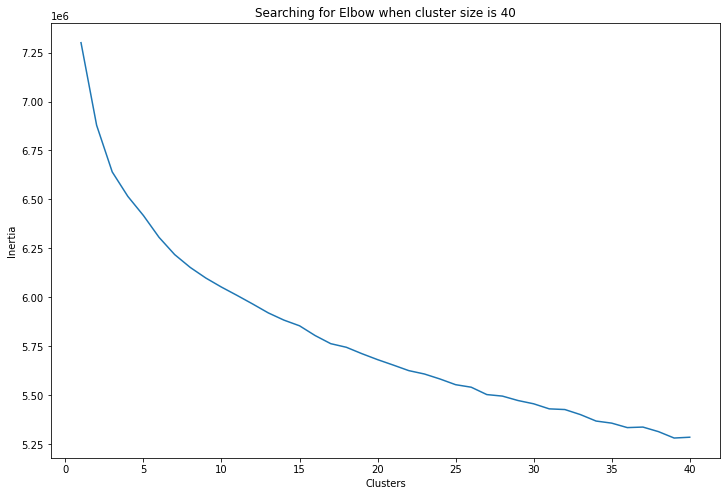

In [ ]:
km_pca, clusters = kmeans_cluster(40, X_kmeans)

In [ ]:
df_pca = create_df(km_pca.labels_, y)

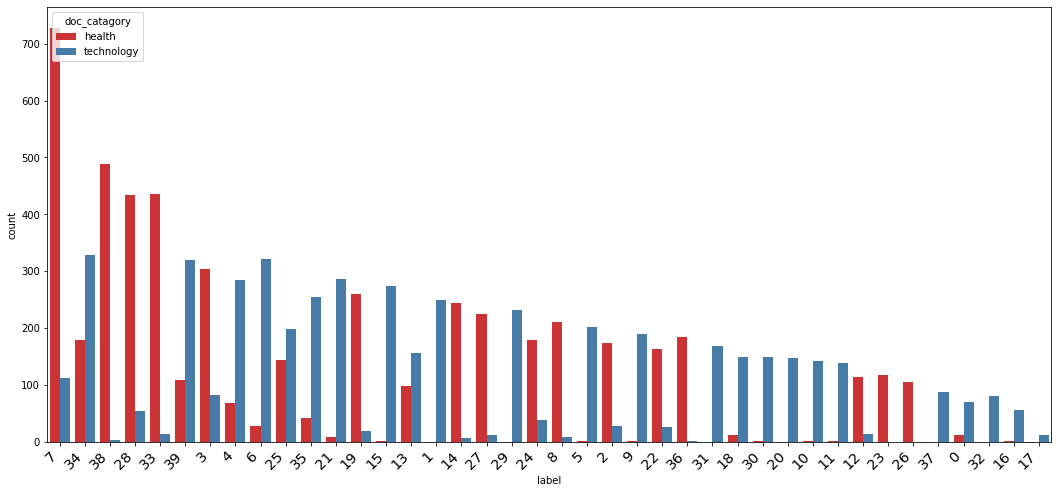

In [ ]:
plot_figure(df_pca, 'label','doc_catagory')

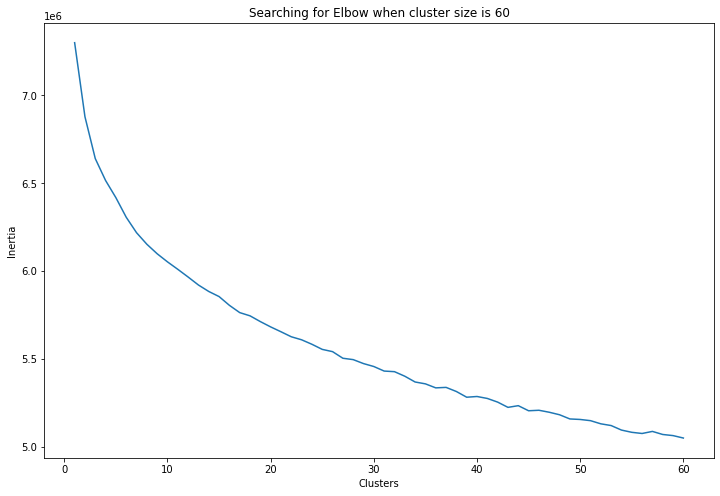

In [ ]:
km_pca, clusters = kmeans_cluster(60, X_kmeans)

In [ ]:
df_pca = create_df(km_pca.labels_, y)

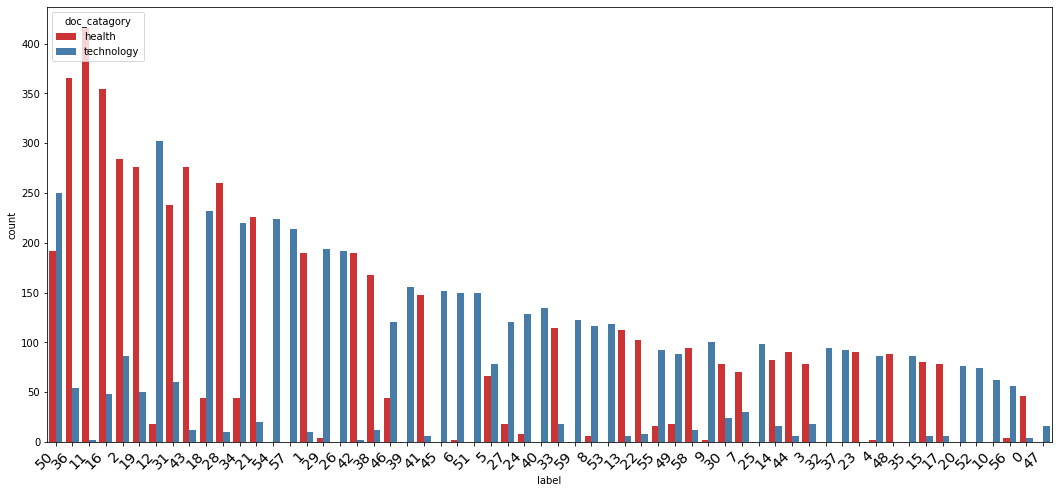

In [ ]:
plot_figure(df_pca, 'label','doc_catagory')

# Cluster Document using K-Means on KPCA reduced data

In [ ]:
X_kpca = data_kpca

In [ ]:
X_kpca.head()

,Component_1,Component_2,label
0,0.016871,0.062809,health
1,-0.159731,-0.099900,technology
2,0.047788,0.051254,health
3,-0.196270,-0.078477,technology
4,-0.209384,-0.036187,health


In [ ]:
y = X_kpca.pop('label')

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_kpca, y, test_size=0.05, random_state=42)

In [ ]:
X_kpca.shape

(10000, 2)

In [ ]:
y.shape

(10000,)

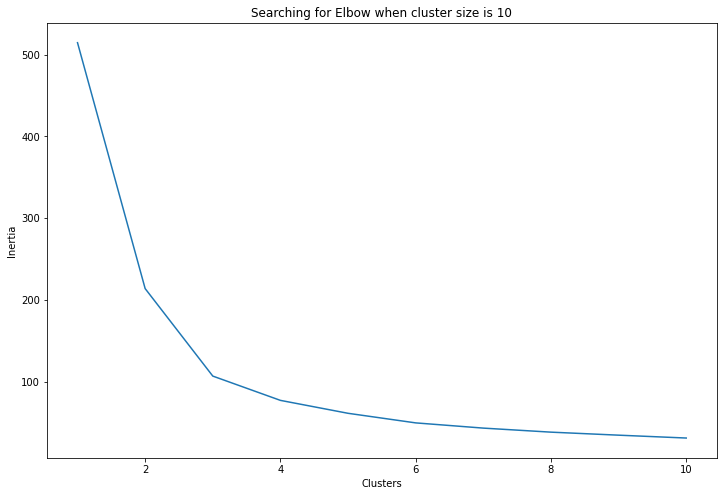

In [ ]:
km_kpca, clusters = kmeans_cluster(10, X_kpca)

In [ ]:
clusters

[514.6542514728818,
 213.85460715327832,
 106.84667142848299,
 77.12985308222474,
 61.32043213651049,
 49.59557517529601,
 43.20658513377141,
 38.263840030385786,
 34.56654333269835,
 31.068267721696092]

In [ ]:
km_kpca.labels_.shape

(10000,)

In [ ]:
df_kpca = create_df(km_kpca.labels_, y)

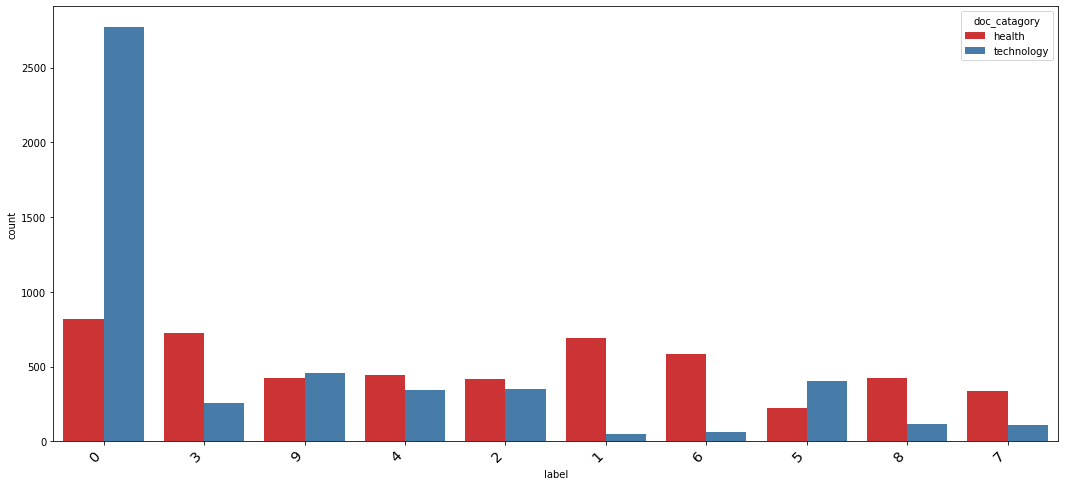

In [ ]:
plot_figure(df_kpca, 'label','doc_catagory')

# Cluster Document using K-Means on UMDP reduced data

In [ ]:
X_umap = data_umap

In [ ]:
X_umap.head()

,Component_1,Component_2,Component_3,Component_4,Component_5,label
0,7.332139,9.666074,5.394394,-2.601379,2.772509,health
1,4.093304,9.589003,6.360199,-1.844557,11.277091,technology
2,8.916203,8.999536,1.369477,-1.545412,1.207037,health
3,4.303977,9.261281,5.846497,-0.754982,10.190146,technology
4,1.404892,10.766094,-0.089052,1.422105,2.829908,health


In [ ]:
y=X_umap.pop('label')

In [ ]:
y.shape

(10000,)

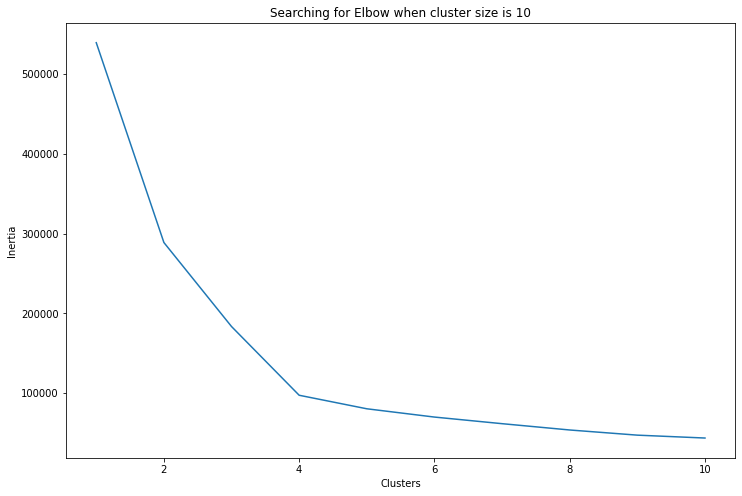

In [ ]:
km_umap, clusters = kmeans_cluster(10, X_umap)

In [ ]:
df_umap = create_df(km_umap.labels_, y)

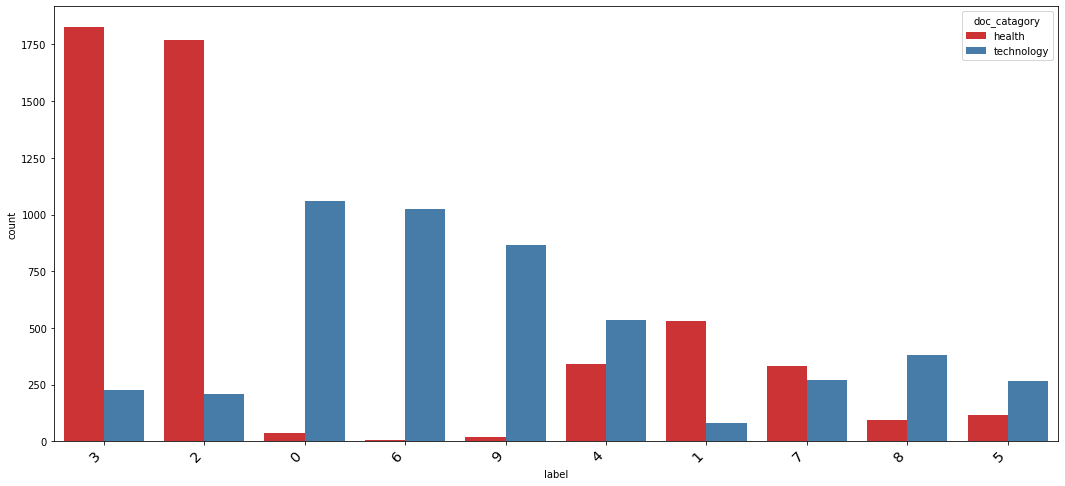

In [ ]:
plot_figure(df_umap, 'label','doc_catagory')

In [ ]:
def plot_all_cluster(df, data_col1,data_col2,cluster_size):
  plt.figure(figsize=(12, 8))
  sns.scatterplot(data_col1, data_col2, hue=df['label'], 
                  palette=sns.color_palette('hls', cluster_size))
  plt.title('KMeans with 10 Clusters')
  plt.show()


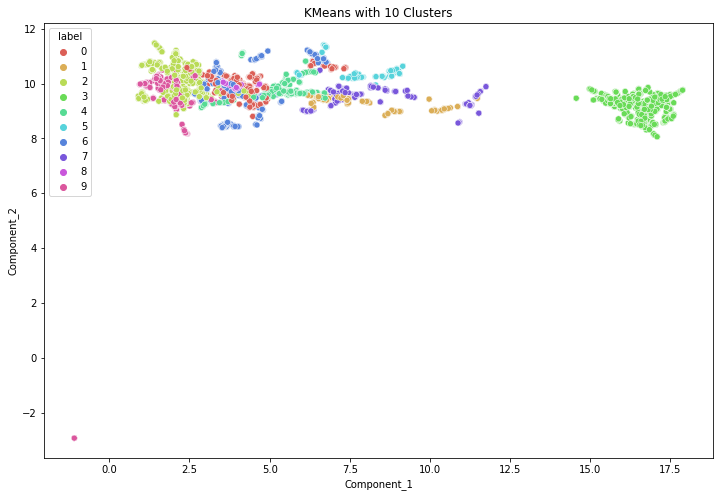

In [ ]:
plot_all_cluster(df_umap, X_umap['Component_1'],X_umap['Component_2'],10)

# Cluster Document using DBSCAN on PCA reduced data

In [ ]:
#select number of components from PCA result which explain 95% of variance is 305
X_db_pca = article_embed_pca

In [ ]:
y = data_tech_health_sample['tech_health_tag']

In [ ]:
X_db_pca = X_db_pca.loc[:,0:305]

In [ ]:
X_db_pca.shape

(10000, 306)

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'DBSCAN with epsilon 25, min samples 6')

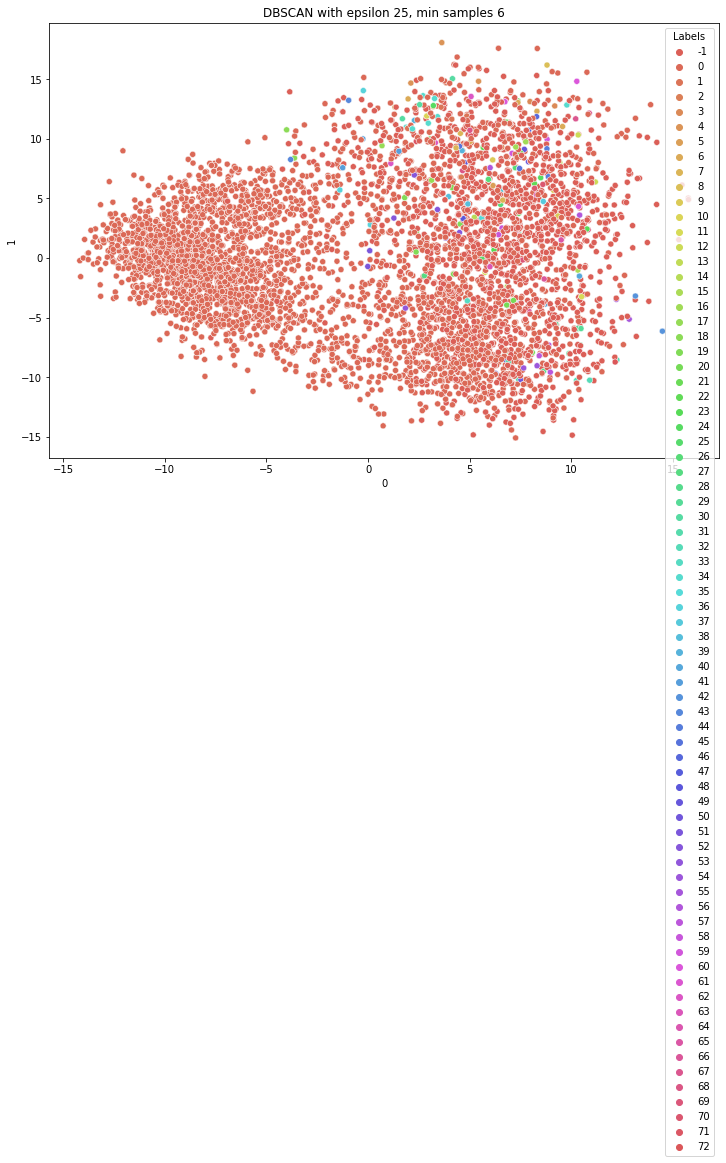

In [ ]:
from sklearn.cluster import DBSCAN 

db = DBSCAN(eps=25, min_samples=3).fit(X_db_pca)

X_db_pca['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X_db_pca[0], X_db_pca[1], hue=X_db_pca['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 25, min samples 6')
plt.show()

In [ ]:
X_db_pca['Labels'].value_counts()

 0     6892
-1     2734
 6       16
 1       14
 19      14
       ... 
 8        4
 42       4
 43       4
 44       4
 72       4
Name: Labels, Length: 74, dtype: int64

In [ ]:
# X_db_pca.pop('Labels')

In [ ]:
df_db = create_df(db.labels_, y)
df_db.shape

(10000, 2)

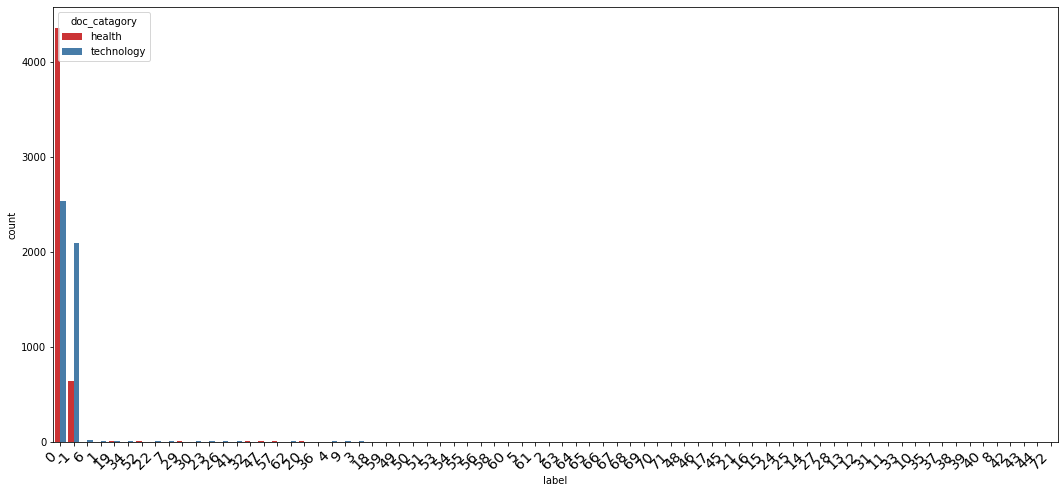

In [ ]:
plot_figure(df_db, 'label','doc_catagory')

# Cluster Document using DBSCAN on UMDP reduced data

In [ ]:
X_db_umdp = data_umap

In [ ]:
X_db_umdp.pop('Labels')

0       10
1       28
2        9
3       21
4       18
        ..
9995    14
9996     7
9997    -1
9998    13
9999    13
Name: Labels, Length: 10000, dtype: int64

In [ ]:
y = data_tech_health_sample['tech_health_tag']

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'DBSCAN with epsilon 0.8, min samples 6')

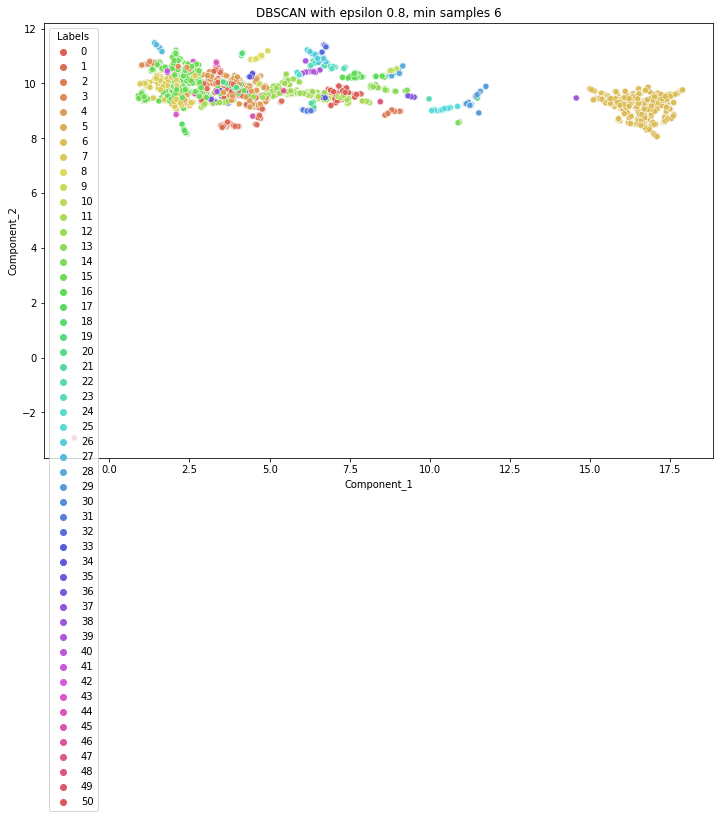

In [ ]:
from sklearn.cluster import DBSCAN 
db = DBSCAN(eps=0.8, min_samples=6).fit(X_db_umdp)

X_db_umdp['Labels'] = db.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X_db_umdp['Component_1'], X_db_umdp['Component_2'], hue=X_db_umdp['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 0.8, min samples 6')
plt.show()

In [ ]:
X_db_umdp['Labels'].value_counts(ascending=True)

45       6
50       8
41      10
30      12
20      12
38      12
43      14
49      14
22      14
42      16
48      20
47      22
37      24
46      24
40      26
14      26
21      32
33      32
36      36
44      36
18      42
8       42
10      44
31      44
9       50
35      50
17      50
24      54
34      54
32      56
39      64
2       70
28      74
27      78
25     100
29     112
13     114
23     132
16     152
26     162
5      180
3      190
0      246
11     384
19     410
12     718
1      760
7      768
4      934
15    1442
6     2028
Name: Labels, dtype: int64

In [ ]:
df_db_umdp = create_df(db.labels_, y)
df_db_umdp.shape

(10000, 2)

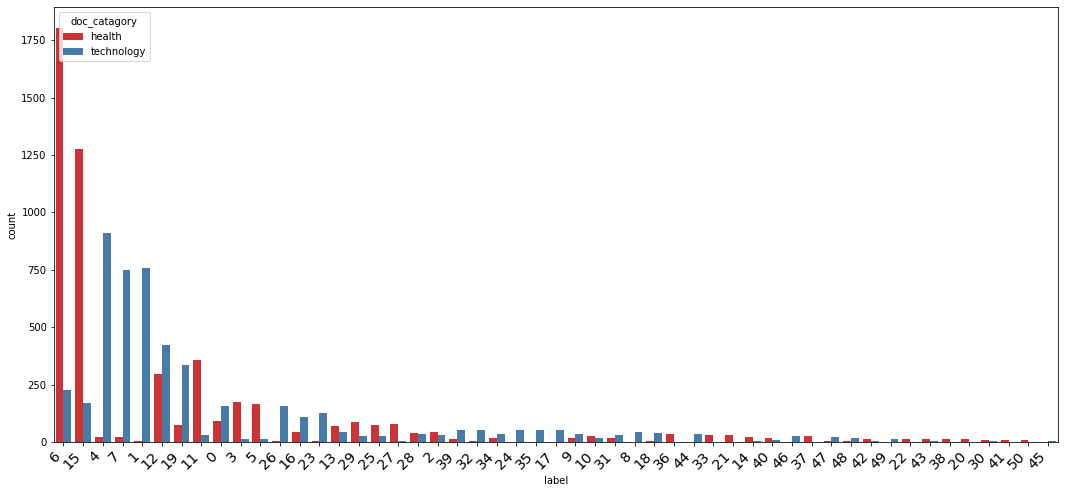

In [ ]:
plot_figure(df_db_umdp,'label','doc_catagory')

# Cluster Document using HDBSCAN on UMDP reduced data

In [ ]:
from hdbscan import HDBSCAN


In [ ]:
X_hdb_umdp = data_umap

In [ ]:
X_hdb_umdp.head()

,Component_1,Component_2,Component_3,Component_4,Component_5
0,5.263366,2.210764,-2.252100,-0.922481,8.446700
1,-0.602789,3.424239,-3.034621,5.537161,10.526425
2,5.502221,0.009782,1.641876,-1.614253,5.917917
3,0.486679,3.175171,-1.802012,5.048345,9.231772
4,-0.209661,-0.869410,4.302149,-1.123776,10.237087


In [ ]:
X_hdb_umdp.pop('Labels')

0       34
1       85
2       40
3       80
4        3
        ..
9995    92
9996    55
9997    39
9998    -1
9999    75
Name: Labels, Length: 10000, dtype: int64

In [ ]:
y = data_tech_health_sample['tech_health_tag']

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'HDBSCAN with min_cluster_size 40, min samples 1')

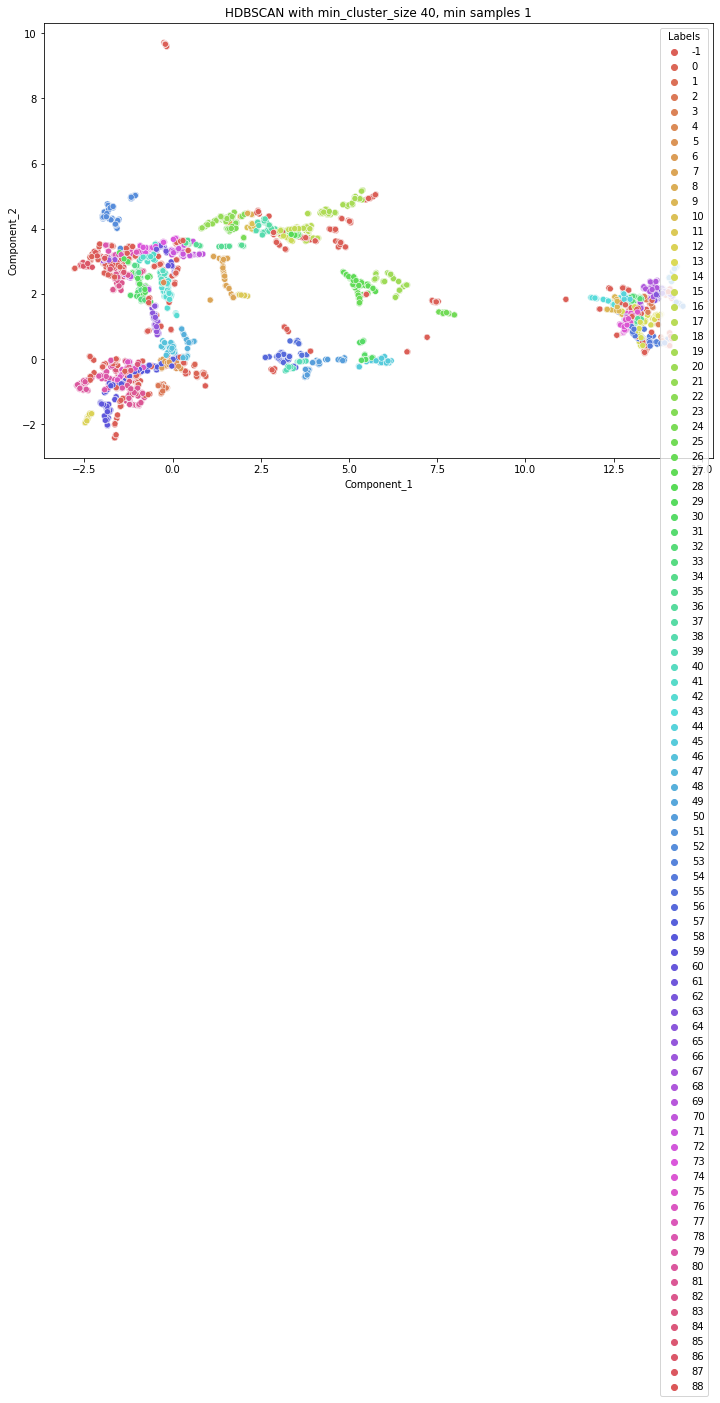

In [ ]:
# 
hdb = HDBSCAN(min_cluster_size=45, min_samples=2, metric='euclidean', cluster_selection_method='eom', gen_min_span_tree=True, prediction_data=True).fit(X_hdb_umdp)

X_hdb_umdp['Labels'] = hdb.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X_hdb_umdp['Component_1'], X_hdb_umdp['Component_2'], hue=X_hdb_umdp['Labels'], 
                palette=sns.color_palette('hls', np.unique(hdb.labels_).shape[0]))
plt.title('HDBSCAN with min_cluster_size 40, min samples 1')
plt.show()

In [ ]:
X_hdb_umdp['Labels'].value_counts()[:10]

-1     1765
 58     282
 14     208
 29     186
 27     174
 52     170
 75     166
 82     162
 21     150
 84     148
Name: Labels, dtype: int64

In [ ]:
df_hdb_umdp = create_df(hdb.labels_, y)
df_hdb_umdp.shape

(10000, 2)

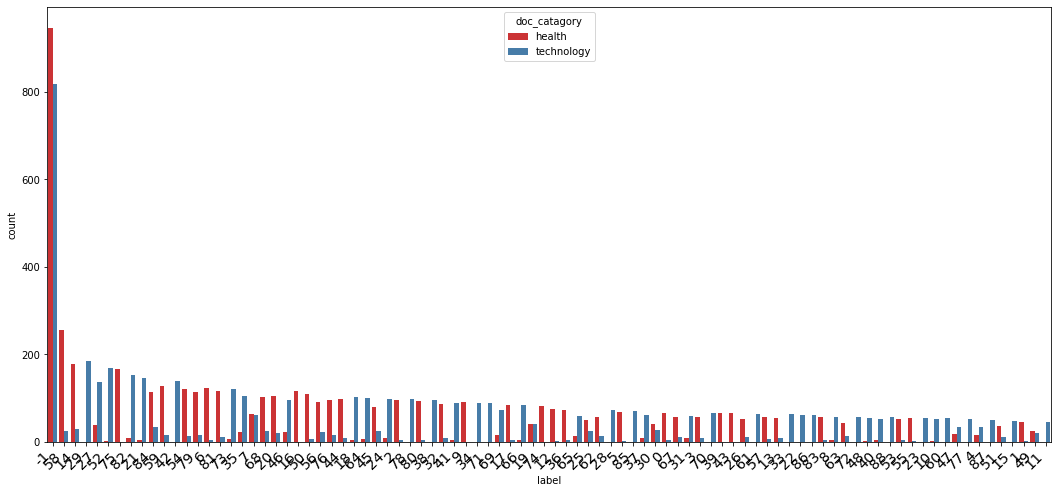

In [ ]:
plot_figure(df_hdb_umdp, 'label','doc_catagory')

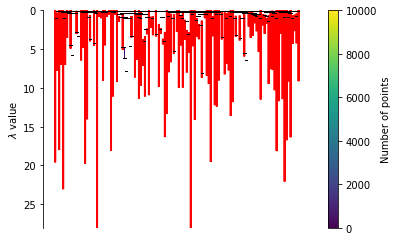

In [ ]:
hdb.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

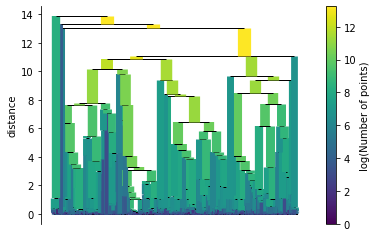

In [ ]:
hdb.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

# Apply Class based TF-IDF on each cluster obtained by DBSCAN and Extract Topics

In [ ]:

class CTFIDFVectorizer(TfidfTransformer):
    def __init__(self, *args, **kwargs):
        super(CTFIDFVectorizer, self).__init__(*args, **kwargs)

    def fit(self, X: sp.csr_matrix, n_samples: int):
        """Learn the idf vector (global term weights) """
        _, n_features = X.shape
        df = np.squeeze(np.asarray(X.sum(axis=0)))
        idf = np.log(n_samples / df)
        self._idf_diag = sp.diags(idf, offsets=0,
                                  shape=(n_features, n_features),
                                  format='csr',
                                  dtype=np.float64)
        return self

    def transform(self, X: sp.csr_matrix) -> sp.csr_matrix:
        """Transform a count-based matrix to c-TF-IDF """
        X = X * self._idf_diag
        X = normalize(X, axis=1, norm='l1', copy=False)
        return X

# Perform preprocessing steps

In [ ]:
lemmatizer = WordNetLemmatizer()
# Lemmatization
def preprocess_text_ctfidf(doc_article):
  words = nltk.word_tokenize(doc_article)
  words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english')) and len(word) > 3]
  docs = ' '.join(words)
  docs = re.sub('[!"#$%&\'()’*+,-./:;<=>?—@[\\]^_`{|}~’]', '', docs)
  return docs

In [ ]:
data_tech_health_sample['article_filter'] = data_tech_health_sample['article'].apply(preprocess_text_ctfidf)

In [ ]:
data_tech_health_sample.head(2)

,article,section,tech_health_tag,article_filter
0,hamburg reuters germany and poland are discussing new action to prevent the spread of the pig disease african swine fever asf in wild boars in po...,Health News,health,hamburg reuters germany poland discussing action prevent spread disease african swine fever wild boar poland close german border including border ...
1,bits the trajectory of the world’s biggest public company these days appears to be a zigzag. three months ago that company — apple — posted its fi...,technology,technology,bit trajectory world biggest public company day appears zigzag three month company apple posted first yearoveryear revenue decline year sale iphon...


In [ ]:
# Create documents per cluster label
def create_doc(data, class_labels):
  article_doc = pd.DataFrame({'Document': data, 'Class': class_labels})
  article_docs_per_class = article_doc.groupby(['Class'], as_index=False).agg({'Document': ' '.join})
  return article_doc, article_docs_per_class


In [ ]:
article_doc, article_docs_per_class = create_doc(data_tech_health_sample.article_filter, db.labels_)

In [ ]:
article_doc.head(2)

,Document,Class
0,hamburg reuters germany poland discussing action prevent spread disease african swine fever wild boar poland close german border including border ...,0
1,bit trajectory world biggest public company day appears zigzag three month company apple posted first yearoveryear revenue decline year sale iphon...,1


In [ ]:
article_docs_per_class.shape

(51, 2)

# Informative Words per Class
- Extract the c-TF-IDF matrix and find the highest values in each class:

In [ ]:
def get_topic(id):
  # Create bag of words
  count_vectorizer = CountVectorizer().fit(article_docs_per_class.Document)
  count = count_vectorizer.transform(article_docs_per_class.Document)
  words = count_vectorizer.get_feature_names()

  # Extract top 10 words per class
  ctfidf = CTFIDFVectorizer().fit_transform(count, n_samples=len(article_doc)).toarray()
  words_per_class = {label: [words[index] for index in ctfidf[label].argsort()[-10:]] 
                    for label in article_docs_per_class.Class}
  return words_per_class[id]

# Select One Topic

- You can select a specific topic and get the top n words for that topic 


In [ ]:
get_topic(58)

['bacteria',
 'drinking',
 'product',
 'plastic',
 'ball',
 'triclosan',
 'ingredient',
 'deodorant',
 'chemical',
 'water']

In [ ]:
get_topic(14)

['s2medical',
 'coverage',
 'text',
 'order',
 'publ',
 'eikon',
 'swedish',
 'newsroom',
 'gdynia',
 'crown']

# Apply Class based TF-IDF on each cluster obtained by HDBSCAN and Extract Topics

In [ ]:
article_doc, article_docs_per_class = create_doc(data_tech_health_sample.article_filter, hdb.labels_)

In [ ]:
get_topic(58)

['bacteria',
 'drinking',
 'product',
 'plastic',
 'ball',
 'triclosan',
 'ingredient',
 'deodorant',
 'chemical',
 'water']

In [ ]:
get_topic(14)

['s2medical',
 'coverage',
 'text',
 'order',
 'publ',
 'eikon',
 'swedish',
 'newsroom',
 'gdynia',
 'crown']

In [ ]:
get_topic(75)

['bayer',
 'immunotec',
 'coverage',
 'clinical',
 'trevena',
 'text',
 'phase',
 'eikon',
 'newsroom',
 'gdynia']

In [ ]:
get_topic(29)

['venmo',
 'lab',
 'waterfront',
 'stein',
 'soleri',
 'bank',
 'arcosanti',
 'soleris',
 'toronto',
 'sidewalk']

In [ ]:
get_topic(11)

['encryption',
 'quarles',
 'backpage',
 'waymo',
 'whatsapp',
 'uber',
 'strava',
 'selfdriving',
 'abramowitz',
 'francisco']

In [ ]:
get_topic(48)

['verily',
 'wearable',
 'sleep',
 'fitbit',
 'blood',
 'patient',
 'monitor',
 'zocdoc',
 'doctor',
 'diabetes']

In [ ]:
Topic1 = ['takeda', 'endologix','scientific','march', 'diagnostics','eurobio','said','antibiotic','drug','malaysia']

In [ ]:
a = pd.DataFrame(Topic1, columns=['Topic_1'])
from wordcloud import WordCloud

Text(0.5, 1.0, 'Topic 1 generated using LDA')

(-0.5, 399.5, 199.5, -0.5)

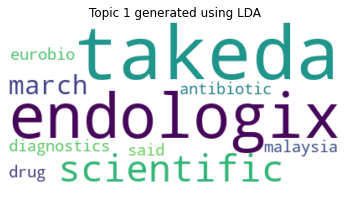

In [ ]:
from wordcloud import WordCloud

#Importing Dataset

# df = pd.read_csv("1.csv")

#Checking the Data


#Creating the text variable

text2 = " ".join(title for title in a['Topic_1'])

# Creating word_cloud with text as argument in .generate() method

word_cloud2 = WordCloud(collocations = False, background_color = 'white').generate(text2)

# Display the generated Word Cloud

plt.imshow(word_cloud2, interpolation='bilinear')
plt.title('Topic 1 generated using LDA')

plt.axis("off")

plt.show()

# Apply Latent Dirichlet Allocation (LDA) on each cluster obtained by HDBSCAN and Extract Topics

#  Perform preprocessing steps 

In [ ]:
np.random.seed(2018)


In [ ]:
def preprocess_text_lda(doc_article):
  doc_article = re.sub('[!"#$%&\'()’*+,-./:;<=>?—@[\\]^_`{|}~’]', '', doc_article)
  words = nltk.word_tokenize(doc_article)
  words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english')) and len(word) > 3]
  
  return words

In [ ]:
data_tech_health_sample_lda = pd.read_csv('/content/data_tech_health_sample', sep=',')

In [ ]:
data_tech_health_sample_lda['article_filter_lda'] = data_tech_health_sample_lda['article'].apply(preprocess_text_lda)

In [ ]:
processed_docs_per_class = {}
data_tech_health_sample_lda['label'] = hdb.labels_

In [ ]:
data_tech_health_sample_lda['label'].value_counts()

 89    462
-1     342
 51    310
 50    278
 46    228
      ... 
 69     42
 35     42
 78     42
 14     42
 83     40
Name: label, Length: 105, dtype: int64

In [ ]:
processed_docs_per_class = {}
data_tech_health_sample['label'] = hdb.labels_
for i in data_tech_health_sample['label'].unique():
  processed_docs_per_class[i] = data_tech_health_sample_lda[data_tech_health_sample_lda['label']==i]['article'].map(preprocess_text_lda)
  
len(processed_docs_per_class[65])

74

# Bag of Word

In [ ]:
# Create a dictionary from ‘processed_docs_per_class 
# containing the number of times a word appears in the cluster.
dictionary = {}
for cluster_ind in processed_docs_per_class.keys():
  dictionary[cluster_ind] = gensim.corpora.Dictionary(processed_docs_per_class[cluster_ind].reset_index(drop=True))


In [ ]:
len(processed_docs_per_class[48])

60

In [ ]:
# count = 0
# for k, v in dictionary[48].iteritems():
#     print(k, v)
#     # count += 1
#     # if count > 10:
#     #     break

In [ ]:
# how many words and how many times those words appear in each class documents
bow_corpus = {}

for cluster_ind in processed_docs_per_class.keys():
  bow_corpus[cluster_ind] = [dictionary[cluster_ind].doc2bow(doc) for doc in processed_docs_per_class[cluster_ind]]


In [ ]:
# bow_corpus[48]

In [ ]:
# dictionary[48]

In [ ]:
from gensim import corpora, models
corpus_tfidf = {}

for bow_ind in bow_corpus.keys():
  tfidf = models.TfidfModel(bow_corpus[bow_ind])
  corpus_tfidf[bow_ind] = tfidf[bow_corpus[bow_ind]]

In [ ]:
# from pprint import pprint
# for doc in corpus_tfidf[48]:
#     pprint(doc)
    

In [ ]:
corpus_tfidf.keys()

dict_keys([50, 9, 45, 88, 37, 75, 30, 78, 41, 0, 64, 55, 69, 71, 26, 81, 92, 32, 10, 90, 74, -1, 85, 2, 60, 103, 102, 40, 89, 65, 66, 79, 3, 16, 46, 84, 21, 4, 51, 56, 63, 83, 14, 52, 22, 36, 38, 72, 18, 6, 57, 44, 68, 61, 94, 23, 59, 35, 20, 48, 87, 49, 31, 1, 96, 13, 39, 80, 12, 27, 29, 43, 19, 76, 53, 77, 67, 47, 11, 86, 25, 98, 7, 91, 99, 42, 93, 95, 101, 54, 8, 15, 97, 100, 73, 34, 70, 24, 82, 33, 58, 28, 17, 62, 5])

In [ ]:
import multiprocessing

cores = multiprocessing.cpu_count() # Count the number of cores in colab cpu
cores

4

# Running LDA using TF-IDF

In [ ]:
lda_topics_per_class = {}
for ind_key in corpus_tfidf.keys():
  lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf[ind_key], num_topics=10, iterations = 5000, id2word=dictionary[ind_key], passes=50, workers=3)
  # each element of the list is a tuple containing the topic and word / probability list
  lda_topics_per_class[ind_key] = lda_model_tfidf.show_topics(num_words = 10, formatted = False)

# for idx, topic in lda_model_tfidf.print_topics(-1):
#     print('Topic: {} Word: {}'.format(idx, topic))

lda_topics_per_class[17]

[(0,
  [('iphone', 0.0020968236),
   ('site', 0.0012682788),
   ('apple', 0.0012327653),
   ('shipment', 0.0011479999),
   ('clyburn', 0.0011002544),
   ('model', 0.0010714236),
   ('obama', 0.0010708115),
   ('modem', 0.001018986),
   ('cooper', 0.0009767247),
   ('october', 0.0009642301)]),
 (1,
  [('hundt', 0.0028677965),
   ('modem', 0.0023789199),
   ('merger', 0.002087228),
   ('justice', 0.0020856431),
   ('department', 0.0019675768),
   ('charter', 0.00184547),
   ('speed', 0.0018236407),
   ('attorney', 0.0013598562),
   ('snapdragon', 0.0013248628),
   ('average', 0.0011286495)]),
 (2,
  [('bewkes', 0.0023992427),
   ('spreadsheet', 0.0022564163),
   ('youre', 0.0021935336),
   ('unlocked', 0.002007548),
   ('abroad', 0.0018591849),
   ('phone', 0.0018000305),
   ('template', 0.0017402678),
   ('leon', 0.0016763295),
   ('warner', 0.0015973361),
   ('distribution', 0.0015859613)]),
 (3,
  [('beacon', 0.0026100741),
   ('tracking', 0.001320913),
   ('uidh', 0.0012883625),
   (

In [ ]:
lda_topics_per_class[46]

[(0,
  [('bird', 0.0014582751),
   ('previous', 0.0013861267),
   ('korea', 0.0012396125),
   ('versus', 0.0011379371),
   ('seoul', 0.00093071983),
   ('54453', 0.00089022395),
   ('bitly2uiuqcx', 0.00089022395),
   ('68440', 0.00089022395),
   ('farm', 0.00088349317),
   ('malaysia', 0.00083815935)]),
 (1,
  [('wedding', 0.0025021946),
   ('injury', 0.0019454474),
   ('autism', 0.001472182),
   ('mumps', 0.0014404767),
   ('couple', 0.0010574327),
   ('1918', 0.0009873202),
   ('davis', 0.0009760827),
   ('abroad', 0.00094787765),
   ('chickenpox', 0.0008635581),
   ('kunkel', 0.0008635581)]),
 (2,
  [('methodology', 0.00012564547),
   ('percent', 0.00012564525),
   ('reflect', 0.00012564505),
   ('hubei', 0.00012564505),
   ('biosecurity', 0.00012564498),
   ('included', 0.0001256449),
   ('honeymoon', 0.00012564477),
   ('method', 0.00012564476),
   ('toll', 0.00012564474),
   ('francisco', 0.00012564474)]),
 (3,
  [('amazon', 0.0014022201),
   ('pfizer', 0.001296782),
   ('session

In [ ]:
lda_topics_per_class[89]

[(0,
  [('biopharma', 0.0047366624),
   ('offering', 0.0045708395),
   ('pharmaceutical', 0.004372678),
   ('oxford', 0.004315912),
   ('novartis', 0.0034761452),
   ('aptinyx', 0.003200917),
   ('therapeutic', 0.0030908403),
   ('medicine', 0.003069237),
   ('housing', 0.0029691171),
   ('corbus', 0.0029189333)]),
 (1,
  [('study', 0.004491518),
   ('pharma', 0.004241469),
   ('hospital', 0.004104131),
   ('takeda', 0.0037149307),
   ('gdynia', 0.003401852),
   ('bridgebio', 0.003390702),
   ('kitov', 0.003327432),
   ('soni', 0.0032208383),
   ('2017', 0.0031882117),
   ('newsroom', 0.0028912732)]),
 (2,
  [('cerenis', 0.004645291),
   ('therapeutic', 0.004009428),
   ('bora', 0.0037301858),
   ('gdynia', 0.0036855862),
   ('launched', 0.0034280063),
   ('smile', 0.0031685338),
   ('newsroom', 0.0031318127),
   ('mdxhealth', 0.0030760884),
   ('halozyme', 0.0030530703),
   ('lupin', 0.0029399353)]),
 (3,
  [('say', 0.009325484),
   ('chinese', 0.00798442),
   ('beijing', 0.007932852)

In [ ]:
file_path1= "/content/drive/MyDrive/GLG_vec_embd/lda_model_topic_result.pkl"

In [ ]:
with open(file_path1, "wb") as f:
    pickle.dump(lda_topics_per_class, f)

In [ ]:
# with open(file_path1, 'rb') as f:
#      lda_topics_per_class = pickle.load(f)


# References

- The code for `Class CTFIDFVectorizer(TfidfTransformer):` is from Martin Grootendorst posted on [towardsdatascience](https://towardsdatascience.com/creating-a-class-based-tf-idf-with-scikit-learn-caea7b15b858)

- Topic Modeling and Latent Dirichlet Allocation (LDA) in Python is *from* Susan Li posted on [towardsdatascience](https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24)

